# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import seaborn as sns

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures # для полиномиального фичинга
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree  import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 7.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 7.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 17.1MB/s]


In [7]:
data = pd.read_csv('./train.csv')

In [8]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
data[data['TotalSpent'] == ' '] = data[data['TotalSpent'] == ' '].replace(' ', 0)
data['TotalSpent']=data['TotalSpent'].astype(float)

<ipython-input-11-17230ad47439>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data['TotalSpent'] == ' '] = data[data['TotalSpent'] == ' '].replace(' ', 0)


In [12]:
data.duplicated().sum()

14

In [13]:
data=data.drop_duplicates()

In [14]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,32.480448,64.977563,2293.445549,0.159643,0.260820
std,24.529439,30.176025,2269.111393,0.366310,0.439124
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.537500,401.925000,0.000000,0.000000
50%,29.000000,70.450000,1411.500000,0.000000,0.000000
75%,55.000000,90.050000,3808.637500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [15]:
data.isna().sum(axis=0)

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [16]:
data['Sex'] = data['Sex'].map({'Female': 1, 'Male': 0})
data['HasPartner'] = data['HasPartner'].map({'Yes': 1, 'No': 0})
data['HasChild'] = data['HasChild'].map({'Yes': 1, 'No': 0})
data['HasPhoneService']=data['HasPhoneService'].map({'Yes': 1, 'No': 0})
data['IsBillingPaperless']=data['IsBillingPaperless'].map({'Yes': 1, 'No': 0})


 сначала переведу значения самостоятельно из Yes/No в 1 и 0 соответственно, затем с помощью ван хот энкодера переведу оставшиеся столбцы в доп столбцы, чтобы не мучаться с размерностью

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [17]:
# YOUR CODE
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

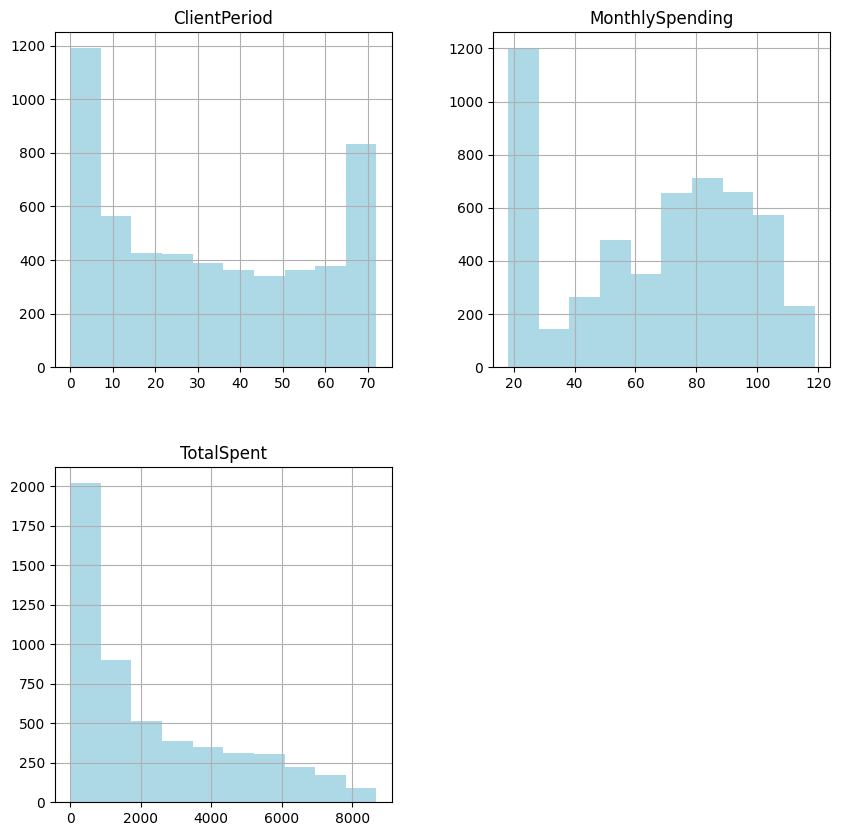

In [18]:

# data.boxplot(column=num_cols[0])
data.hist(num_cols, figsize=(10,10),color='lightblue');


In [ ]:
pd_plt.scatter_matrix(data,  #данные
                     c=pd.factorize(df['quality'])[0], # разделение по цветам
                     alpha=0.1, # прозрачность
                     s=10, # размер точек
                     figsize=(12, 12), # размер окна
                     diagonal='kde', # что на диагонали плотность  kde или hist
                     # hist_kwds={'bins': 100}, # гистограмма настраиваемая диаграмма на диагонали
                     cmap=plt_colors.ListedColormap(['red','blue'])# список цветов
                    )
plt.show()

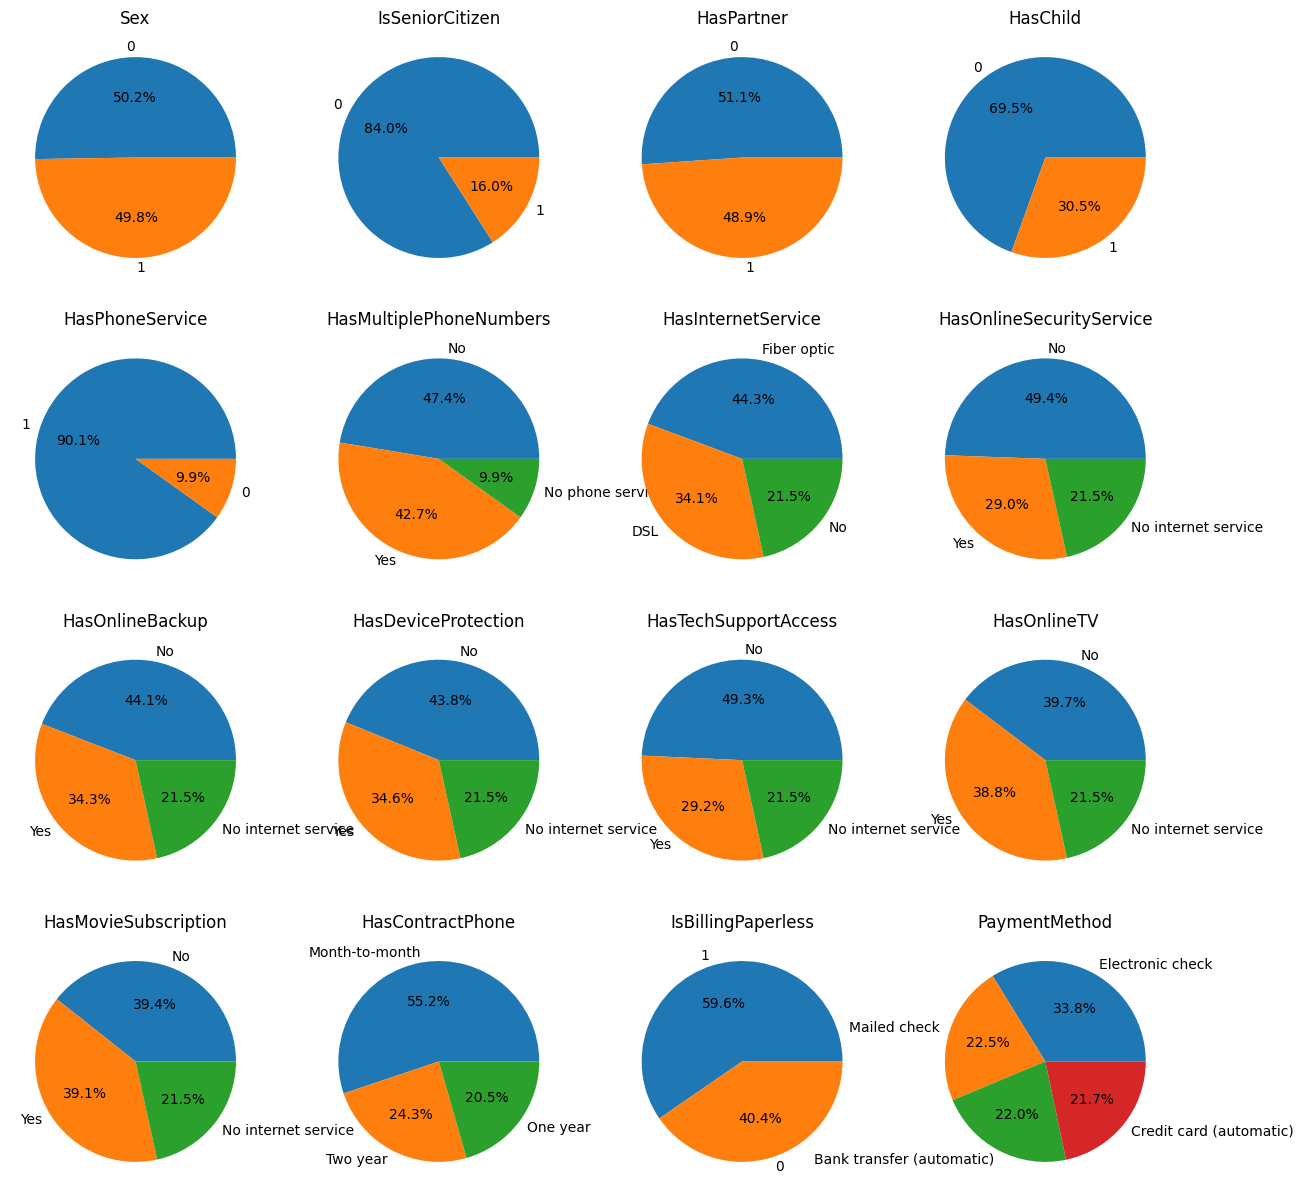

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for ax, col in zip(axes.flatten(), data[cat_cols]):
    ax.set_title(col)
    ax.pie(data[col].value_counts(), autopct="%.1f%%", labels=data[col].value_counts().index)

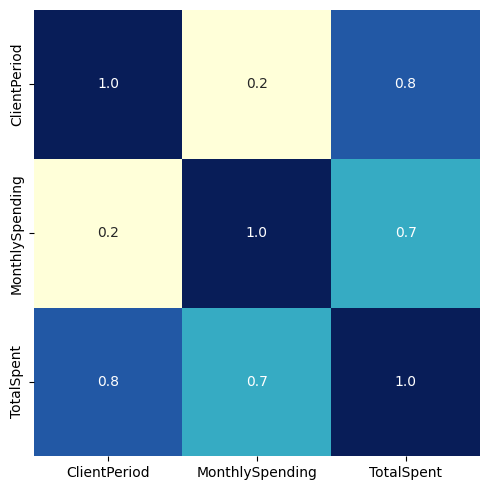

In [20]:
corr = data[num_cols].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr , fmt = '0.1f', cmap = 'YlGnBu', annot=True, cbar=False)
plt.tight_layout()
plt.show()


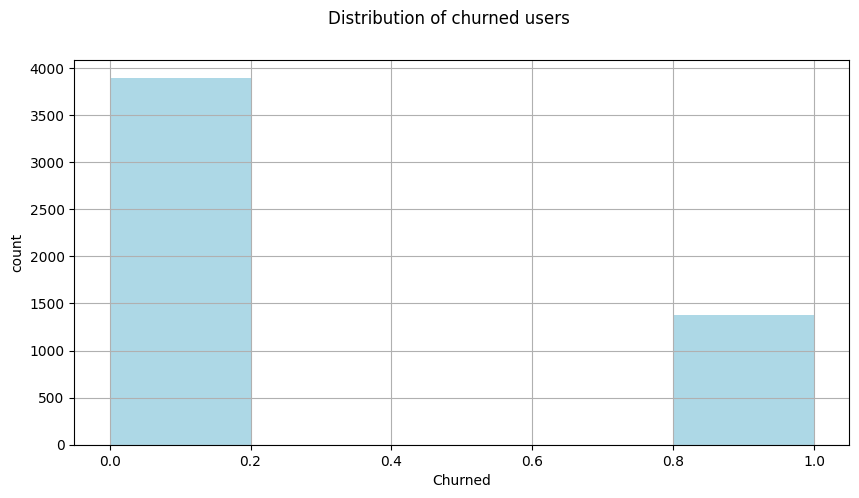

In [21]:
plt.figure(figsize = (10, 5))

data['Churn'].hist(density=False, bins=5,color='lightblue')
plt.ylabel('count')
plt.xlabel('Churned')

plt.suptitle('Distribution of churned users')
plt.show()

классы несбалансированны - буду использовать стратифай по у и шафлсплит в гридсерче, чтобы решить эту проблему

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [22]:
# убрала пустые значения " " в строке тотал_спент и дубликаты (было выше)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

In [45]:
X = data.drop(['Churn'], axis=1)

y = data['Churn']


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [57]:
# ct = make_column_transformer((StandardScaler(), num_cols),
#                             (OneHotEncoder(drop='if_binary'), cat_cols))
# num_cols = X.select_dtypes(include=['float64', 'int64']).columns
# cat_cols = X.select_dtypes(include=['object', 'category']).columns


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop="if_binary",handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


# cat_feature_indices = [data.columns.get_loc(col) for col in cat_cols]

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='if_binary'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, num_cols),
#         ('cat', categorical_transformer, cat_feature_indices )])

In [58]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2901,41,94.90,3848.00,1,0,1,1,1,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic)
4668,68,20.05,1386.90,1,0,0,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic)
852,70,39.15,2692.75,0,0,1,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,1,Credit card (automatic)
5032,24,66.30,1559.45,1,0,1,0,1,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,0,Mailed check
4513,72,108.95,7875.00,0,0,1,0,1,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,1,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,24,49.70,1218.25,0,0,0,0,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check
4061,69,39.10,2779.50,0,0,1,1,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,0,Mailed check
175,33,79.00,2576.80,0,0,0,0,1,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,1,Credit card (automatic)
2128,12,19.80,202.25,0,0,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic)


In [82]:
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
pipe = Pipeline([('preprocessing', preprocessor),
                 ('classifier', LogisticRegression())])


C=[0.001,0.01,0.1,1,10,100]


param_grid = [{
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__C' : C
    },
    {
        'classifier__penalty': ['l2'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'classifier__C' : C
    }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1,scoring='roc_auc',refit=True)

grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
grid_result = pd.DataFrame(grid.cv_results_)
display(grid_result.sort_values(["rank_test_score",'std_test_score']).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.832551

Правильность для наилучшей модели на тестовом наборе: 0.857248



,39,37,40,10,41,11,32,34,35,36,...,19,12,15,13,16,14,3,2,0,1
mean_fit_time,0.083669,0.077909,0.622584,0.787689,0.968262,0.677252,0.14783,0.144996,0.804927,0.53442,...,0.086003,0.070536,0.110087,0.067493,0.145,0.072644,0.263326,0.110422,0.101054,0.124995
std_fit_time,0.003943,0.002465,0.167084,0.235686,0.090902,0.009972,0.042655,0.022255,0.142507,0.021624,...,0.024473,0.002512,0.003968,0.005791,0.009971,0.007156,0.05681,0.02628,0.032574,0.02813
mean_score_time,0.019973,0.019172,0.02991,0.021785,0.035489,0.024169,0.034754,0.040199,0.035278,0.020708,...,0.02312,0.018248,0.019554,0.019394,0.020503,0.01972,0.029018,0.033728,0.03842,0.027565
std_score_time,0.000758,0.000476,0.008918,0.002047,0.009979,0.008811,0.006702,0.00747,0.008615,0.005949,...,0.005848,0.000482,0.000749,0.000315,0.002813,0.000251,0.007446,0.00936,0.013943,0.007819
param_classifier__C,100.0,100.0,100.0,100.0,100.0,100.0,10.0,10.0,10.0,10.0,...,0.01,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.001,0.001
param_classifier__penalty,l2,l2,l2,l1,l2,l1,l2,l2,l2,l2,...,l2,l2,l2,l2,l2,l2,l1,l1,l1,l1
param_classifier__solver,liblinear,newton-cg,sag,liblinear,saga,saga,newton-cg,liblinear,sag,saga,...,liblinear,newton-cg,sag,lbfgs,saga,liblinear,saga,liblinear,liblinear,saga
params,"{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 100, 'classifier__penalty': ...","{'classifier__C': 10, 'classifier__penalty': '...","{'classifier__C': 10, 'classifier__penalty': '...","{'classifier__C': 10, 'classifier__penalty': '...","{'classifier__C': 10, 'classifier__penalty': '...",...,"{'classifier__C': 0.01, 'classifier__penalty':...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.01, 'classifier__penalty':...","{'classifier__C': 0.01, 'classifier__penalty':...","{'classifier__C': 0.001, 'classifier__penalty'...","{'classifier__C': 0.001, 'classifier__penalty'..."
split0_test_score,0.833004,0.833004,0.832938,0.83296,0.833011,0.832989,0.832975,0.832953,0.832938,0.83304,...,0.827349,0.819499,0.819499,0.819499,0.819491,0.819419,0.814753,0.801313,0.5,0.5
split1_test_score,0.859091,0.859091,0.859157,0.859113,0.858974,0.858952,0.858879,0.858879,0.858887,0.858923,...,0.853911,0.849803,0.849803,0.849803,0.849803,0.848504,0.836991,0.822698,0.5,0.5


In [102]:
# grid.best_params_

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       773
           1       0.67      0.52      0.58       281

    accuracy                           0.80      1054
   macro avg       0.75      0.71      0.73      1054
weighted avg       0.79      0.80      0.79      1054



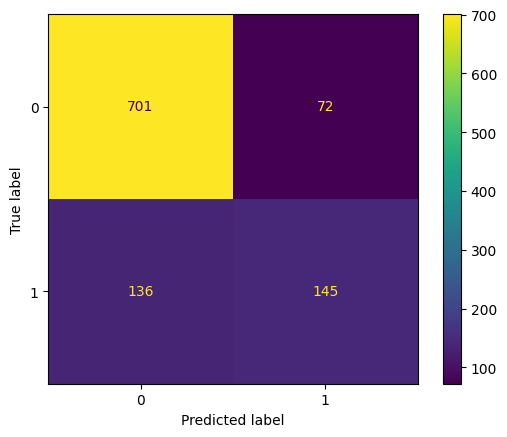

In [103]:
model = make_pipeline(preprocessor, LogisticRegression(solver = 'liblinear' , penalty = 'l2', C =100))
model.fit(X_train,y_train)
y_pred_1=model.predict(X_test)
matrix_1=confusion_matrix(y_test,y_pred_1)
print(classification_report(y_test, y_pred_1))
ConfusionMatrixDisplay(matrix_1).plot();

**knn**

In [90]:
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
pipe = Pipeline([('preprocessing', preprocessor),
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[23,25,27,29,31,35,39,43,47,51]
p=[1, 2, 3]
weights=['uniform','distance']

param_grid =[
    {
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]


grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1,scoring='roc_auc')

grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
grid_result = pd.DataFrame(grid.cv_results_)
display(grid_result.sort_values(["rank_test_score",'std_test_score']).T)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier__n_neighbors': 51, 'classifier__p': 1, 'classifier__weights': 'uniform'}

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.824275

Правильность для наилучшей модели на тестовом наборе: 0.847226



,54,48,42,36,56,50,30,24,38,44,...,13,21,17,7,15,9,11,3,1,5
mean_fit_time,0.090513,0.054868,0.055392,0.10186,0.054978,0.057206,0.053577,0.059722,0.057743,0.115736,...,0.052915,0.054715,0.057083,0.085127,0.080701,0.058968,0.066321,0.058772,0.05401,0.056522
std_fit_time,0.019123,0.00218,0.002875,0.024949,0.001694,0.003524,0.001651,0.010759,0.005091,0.014208,...,0.00263,0.000701,0.002757,0.033936,0.028538,0.002038,0.011512,0.001177,0.001932,0.001467
mean_score_time,0.386386,0.22468,0.239991,0.419741,0.074554,0.073695,0.222013,0.225317,0.071331,0.138725,...,0.222467,0.065151,3.573319,0.337393,0.103419,0.065367,4.059459,0.070659,0.226253,3.181771
std_score_time,0.083334,0.001615,0.011645,0.060772,0.004084,0.00126,0.003173,0.010645,0.002929,0.021712,...,0.004953,0.001255,0.504276,0.096274,0.037496,0.001945,0.736741,0.013928,0.003109,0.027078
param_classifier__n_neighbors,51,47,43,39,51,47,35,31,39,43,...,27,29,27,25,27,25,25,23,23,23
param_classifier__p,1,1,1,1,2,2,1,1,2,2,...,1,2,3,1,2,2,3,2,1,3
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance
params,"{'classifier__n_neighbors': 51, 'classifier__p...","{'classifier__n_neighbors': 47, 'classifier__p...","{'classifier__n_neighbors': 43, 'classifier__p...","{'classifier__n_neighbors': 39, 'classifier__p...","{'classifier__n_neighbors': 51, 'classifier__p...","{'classifier__n_neighbors': 47, 'classifier__p...","{'classifier__n_neighbors': 35, 'classifier__p...","{'classifier__n_neighbors': 31, 'classifier__p...","{'classifier__n_neighbors': 39, 'classifier__p...","{'classifier__n_neighbors': 43, 'classifier__p...",...,"{'classifier__n_neighbors': 27, 'classifier__p...","{'classifier__n_neighbors': 29, 'classifier__p...","{'classifier__n_neighbors': 27, 'classifier__p...","{'classifier__n_neighbors': 25, 'classifier__p...","{'classifier__n_neighbors': 27, 'classifier__p...","{'classifier__n_neighbors': 25, 'classifier__p...","{'classifier__n_neighbors': 25, 'classifier__p...","{'classifier__n_neighbors': 23, 'classifier__p...","{'classifier__n_neighbors': 23, 'classifier__p...","{'classifier__n_neighbors': 23, 'classifier__p..."
split0_test_score,0.805023,0.804659,0.804217,0.8056,0.807292,0.806669,0.805647,0.804586,0.804925,0.804991,...,0.794557,0.791132,0.785937,0.793058,0.789362,0.789348,0.782497,0.788965,0.791547,0.783314
split1_test_score,0.832427,0.831012,0.828717,0.823785,0.827787,0.823544,0.819699,0.821385,0.821553,0.821936,...,0.787152,0.793361,0.790792,0.78586,0.791318,0.791799,0.791504,0.791274,0.78423,0.788516


In [91]:
grid.best_params_

{'classifier__n_neighbors': 51,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       779
           1       0.66      0.56      0.61       275

    accuracy                           0.81      1054
   macro avg       0.76      0.73      0.74      1054
weighted avg       0.80      0.81      0.81      1054



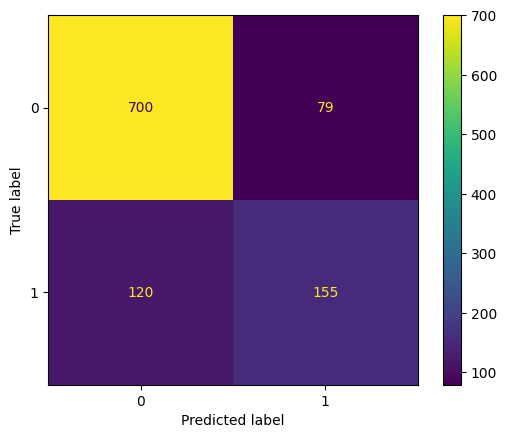

In [92]:
model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=51,p=1,weights='uniform',n_jobs=-1))
model.fit(X_train,y_train)
y_pred_1=model.predict(X_test)
matrix_1=confusion_matrix(y_test,y_pred_1)
print(classification_report(y_test, y_pred_1))
ConfusionMatrixDisplay(matrix_1).plot();

**svc**

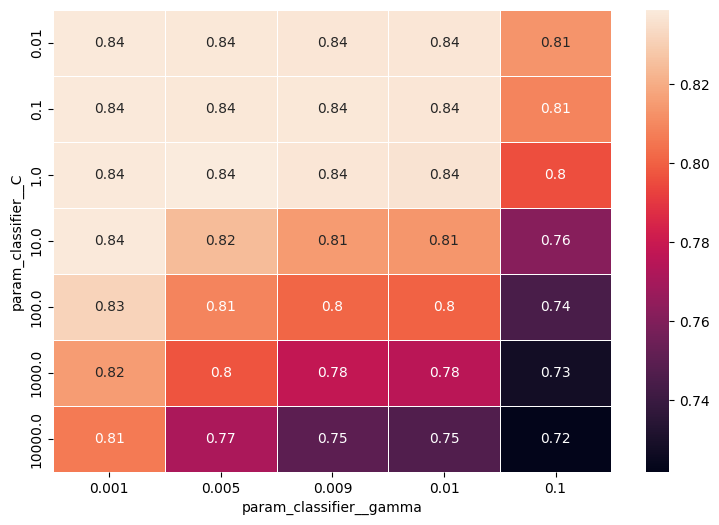

In [85]:
pipe = Pipeline([('preprocessing', preprocessor),
                 ('classifier', svm.SVC())])
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
C=[0.01,0.1,1,10,100,10**3,10**4]
gamma=[0.001,0.005, 0.009, 0.01,0.1]


param_grid =[
    {
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]


grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True,scoring='roc_auc' ,n_jobs=-1,refit=True)
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);



In [87]:
display(pv_table.stack().max())
display(pv_table.stack().idxmax())

0.8389705238581643

(1.0, 0.005)

In [88]:
cls = make_pipeline( preprocessor,svm.SVC(C=10, gamma=0.009) )
cls.fit(X_train,y_train)
y_pred_1 = cls.predict(X_test)
matrix_1=confusion_matrix(y_test,y_pred_1)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       779
           1       0.74      0.48      0.59       275

    accuracy                           0.82      1054
   macro avg       0.79      0.71      0.74      1054
weighted avg       0.81      0.82      0.81      1054



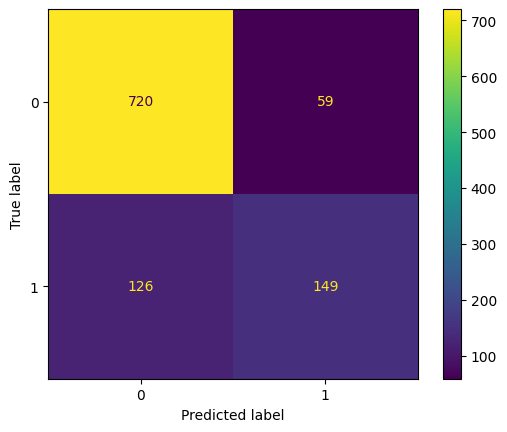

In [89]:
print(classification_report(y_test, y_pred_1))
ConfusionMatrixDisplay(matrix_1).plot();

деревья

In [143]:
pipe =Pipeline([('preprocessing', preprocessor),
                 ('classifier', DecisionTreeClassifier())])

# pipe = Pipeline([('preprocessing', preprocessor),
#                  ('classifier', svm.SVC())])
# cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
# C=[0.01,0.1,1,10,100,10**3,10**4]
# gamma=[0.001,0.005, 0.009, 0.01,0.1]


# param_grid =[
#     {
#      'classifier__C': C,
#      'classifier__gamma': gamma
#      }
# ]


# grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True,scoring='roc_auc' ,n_jobs=-1,refit=True)
# grid.fit(X_train,y_train)


cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
# опишем сетку, по которой будем искать
param_grid = [{
    'classifier__max_depth': np.arange(1, 10),
    'classifier__min_samples_leaf': [1,2, 3,4,5,6,7,8,9,10,11],
    'classifier__splitter': ('best','random'),
    'classifier__criterion':["gini", "entropy", "log_loss"]
}]

# создадим объект GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True,scoring='roc_auc' ,n_jobs=-1,refit=True)

# запустим поиск
grid.fit(X_train, y_train)

# выведем наилучшие параметры
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
grid_result = pd.DataFrame(grid.cv_results_)
display(grid_result.sort_values(["rank_test_score",'std_test_score']).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__splitter': 'random'}

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.823594



,287,99,101,97,88,108,103,307,107,106,...,408,409,410,411,412,413,414,415,416,417
mean_fit_time,0.112283,0.064919,0.093031,0.077414,0.078691,0.142411,0.123304,0.066626,0.138505,0.147565,...,0.060927,0.061228,0.064013,0.058918,0.061994,0.064425,0.061476,0.061052,0.066004,0.061235
std_fit_time,0.030203,0.000819,0.021519,0.012076,0.006861,0.009173,0.029912,0.004577,0.018123,0.018889,...,0.003836,0.002427,0.00697,0.000836,0.002999,0.0103,0.003106,0.003783,0.00677,0.003356
mean_score_time,0.034033,0.019632,0.03027,0.020157,0.020898,0.040072,0.040274,0.021735,0.040147,0.039155,...,0.01978,0.023523,0.019961,0.02127,0.021917,0.020426,0.019091,0.019765,0.019648,0.018854
std_score_time,0.009021,0.000705,0.007618,0.000275,0.002538,0.006827,0.012727,0.002434,0.010004,0.009529,...,0.002513,0.003227,0.001977,0.002557,0.002659,0.001543,0.000637,0.001494,0.000516,0.000343
param_classifier__criterion,entropy,gini,gini,gini,gini,gini,gini,entropy,gini,gini,...,log_loss,log_loss,log_loss,log_loss,log_loss,log_loss,log_loss,log_loss,log_loss,log_loss
param_classifier__max_depth,5,5,5,5,5,5,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1
param_classifier__min_samples_leaf,1,6,7,5,1,11,8,11,10,10,...,7,7,8,8,9,9,10,10,11,11
param_classifier__splitter,random,random,random,random,best,best,random,random,random,best,...,best,random,best,random,best,random,best,random,best,random
params,"{'classifier__criterion': 'entropy', 'classifi...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'entropy', 'classifi...","{'classifier__criterion': 'gini', 'classifier_...","{'classifier__criterion': 'gini', 'classifier_...",...,"{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif...","{'classifier__criterion': 'log_loss', 'classif..."
split0_test_score,0.80252,0.797009,0.797169,0.802538,0.811984,0.811973,0.80061,0.792775,0.806765,0.811693,...,0.71056,0.71056,0.71056,0.71056,0.71056,0.71056,0.71056,0.71056,0.71056,0.71056


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       786
           1       0.56      0.57      0.57       268

    accuracy                           0.78      1054
   macro avg       0.71      0.71      0.71      1054
weighted avg       0.78      0.78      0.78      1054



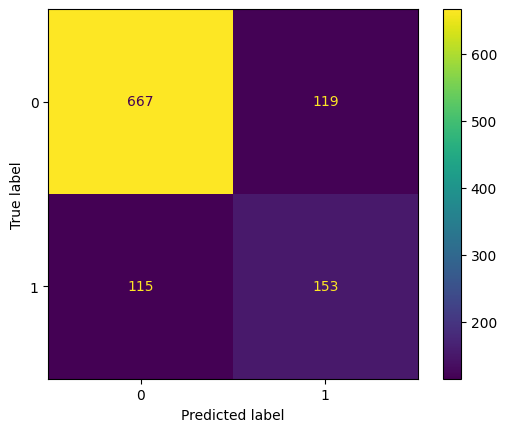

In [147]:
model= make_pipeline( preprocessor, DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,splitter='random',criterion='entropy'))
model.fit(X_train,y_train)
y_pred_1=model.predict(X_test)
matrix_1=confusion_matrix(y_test,y_pred_1)
print(classification_report(y_test, y_pred_1))
ConfusionMatrixDisplay(matrix_1).plot();

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [94]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [98]:
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

In [208]:
X_train, X_test, y_train,y_test = train_test_split(X, y,train_size=0.8, random_state=42)
categorical_indices = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.083298
0:	learn: 0.6406425	total: 37ms	remaining: 7.36s
1:	learn: 0.6047088	total: 63.4ms	remaining: 6.28s
2:	learn: 0.5711027	total: 97.6ms	remaining: 6.41s
3:	learn: 0.5491257	total: 121ms	remaining: 5.92s
4:	learn: 0.5241396	total: 152ms	remaining: 5.95s
5:	learn: 0.5055316	total: 170ms	remaining: 5.51s
6:	learn: 0.4937640	total: 183ms	remaining: 5.04s
7:	learn: 0.4823740	total: 238ms	remaining: 5.7s
8:	learn: 0.4692128	total: 287ms	remaining: 6.09s
9:	learn: 0.4602178	total: 321ms	remaining: 6.1s
10:	learn: 0.4530444	total: 362ms	remaining: 6.22s
11:	learn: 0.4465475	total: 406ms	remaining: 6.36s
12:	learn: 0.4402223	total: 451ms	remaining: 6.49s
13:	learn: 0.4352202	total: 495ms	remaining: 6.57s
14:	learn: 0.4309179	total: 528ms	remaining: 6.51s
15:	learn: 0.4264998	total: 576ms	remaining: 6.62s
16:	learn: 0.4226482	total: 615ms	remaining: 6.62s
17:	learn: 0.4192336	total: 659ms	remaining: 6.66s
18:	learn: 0.4168678	total: 709ms	remaining: 6.75s
19:	learn: 0

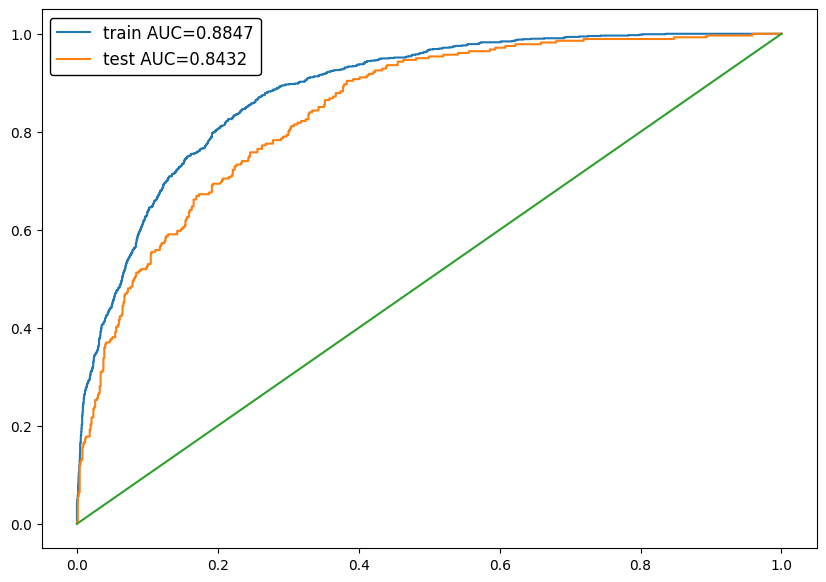

In [99]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [209]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
grid=boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)},
                           X_train,
                           y_train, plot=True, refit=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8495640975
bestIteration = 189

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8495641	best: 0.8495641 (0)	total: 4.19s	remaining: 1m 19s

bestTest = 0.8495907698
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8495908	best: 0.8495908 (1)	total: 6.84s	remaining: 1m 1s

bestTest = 0.8468968618
bestIteration = 178

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8468969	best: 0.8495908 (1)	total: 9.37s	remaining: 53.1s

bestTest = 0.8498917864
bestIteration = 160

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8498918	best: 0.8498918 (3)	total: 11.9s	remaining: 47.6s

be

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [198]:
best_model =catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC', l2_leaf_reg=10)


In [199]:
X = data.drop(['Churn'], axis=1)
X[X['TotalSpent'] == ' '] = X[X['TotalSpent'] == ' '].replace(' ', 0)
y = data['Churn']


In [200]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test[X_test['TotalSpent'] == ' '] = X_test[X_test['TotalSpent'] == ' '].replace(' ', 0)

<ipython-input-200-a566a6c22607>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[X_test['TotalSpent'] == ' '] = X_test[X_test['TotalSpent'] == ' '].replace(' ', 0)


In [201]:
best_model.fit(X,y)
# y_pred=best_model.predict(X_test)

In [202]:
# y_pred

In [203]:
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [205]:
submission['Churn']=boosting_model.predict_proba(X_test)[:, 1]
submission

,Id,Churn
0,0,0.079862
1,1,0.690343
2,2,0.691605
3,3,0.017499
4,4,0.003456
...,...,...
1756,1756,0.169723
1757,1757,0.011739
1758,1758,0.822766
1759,1759,0.600715


Лучшее решение отправьте в Stepik.

In [206]:
submission.to_csv('./my_submission.csv',index=False)

Итоговая  метрика: 0.85 на каггле с кэтбустом